# 식물 질병 데이터

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [45]:
!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

Downloading...
From (original): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
From (redirected): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5&confirm=t&uuid=851d69aa-f27b-4db4-aab3-a6b37b4e67ab
To: /content/PlantVillage.zip
100% 345M/345M [00:06<00:00, 52.3MB/s]


In [46]:
!unzip -q '/content/PlantVillage.zip'

replace PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [68]:
data_root = './PlantVillage'
x_bacterial_spot = data_root + '/Pepper__bell___Bacterial_spot'
x_healthy = data_root + '/Pepper__bell___healthy'

In [69]:
classes = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [49]:
import os

x_train = []
y_train = []

for i in classes:
  path = os.path.join(data_root, i)
  for j in os.listdir(path):
    img_path = os.path.join(path, j)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    x_train.append(img_array)
    y_train.append(classes.index(i))

In [50]:
len(x_train), len(y_train)

(2475, 2475)

In [51]:
x_train = np.array(x_train)
y_train = np.array(y_train)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1980, 224, 224, 3), (495, 224, 224, 3), (1980,), (495,))

In [52]:
samples = np.random.randint(1000, size=25)
samples

array([ 86, 856, 862, 305, 621, 990, 724,  96, 377, 534, 129, 112, 305,
       162, 940, 940, 329,  53, 195, 789, 803, 644, 906, 483,  60])

In [53]:
x_train = x_train / 255.0

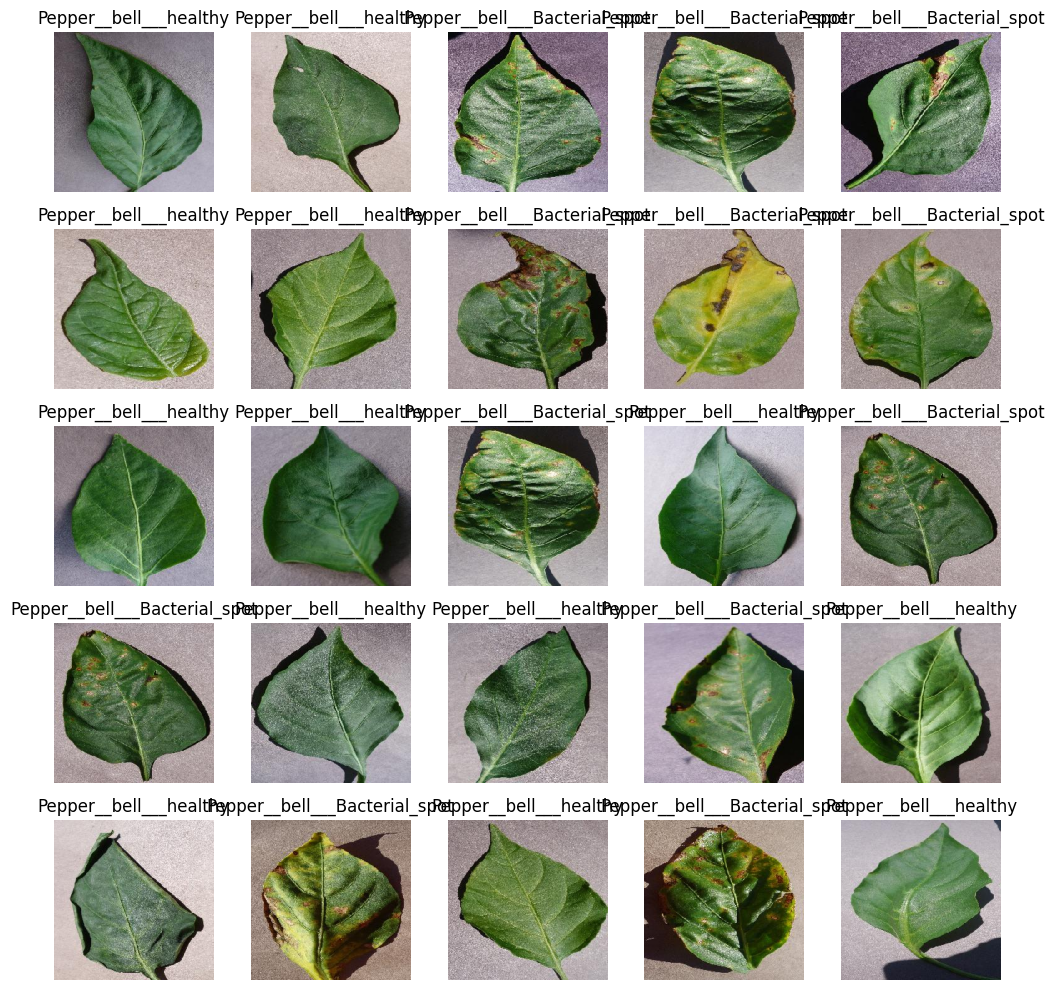

In [54]:
fig = plt.figure(figsize=(10, 10))

for i, idx in enumerate(samples):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[idx])
  plt.axis('off')

  plt.title(classes[int(y_train[idx])])
plt.tight_layout()
plt.show()

### 스케일링

In [55]:
# MinMax Sclaing
x_test_s = x_test/ 255.0

In [56]:
x_train.shape

(1980, 224, 224, 3)

In [57]:
x_test.shape

(495, 224, 224, 3)

## 모델 생성

In [58]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)), # 맥스 풀링 레이어
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(), # 2차원 -> 1차원
    keras.layers.Dense(units = 128, activation='relu'), # Fully connected layer
    keras.layers.Dense(units = 1, activation='sigmoid') # 이진분류 출력층 -> sigmoid & units = 1
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,926,849 (91.27 MB)

 Trainable params: 23,926,849 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy'] # 분류 -> accuracy
    )

In [60]:
EPOCHS = 50
BATCHSIZE = 32

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.5739 - loss: 3.0535 - val_accuracy: 0.8182 - val_loss: 0.4203
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8307 - loss: 0.4057 - val_accuracy: 0.8409 - val_loss: 0.4002
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8721 - loss: 0.3056 - val_accuracy: 0.8914 - val_loss: 0.2817
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9320 - loss: 0.1547 - val_accuracy: 0.9369 - val_loss: 0.1893
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9580 - loss: 0.1234 - val_accuracy: 0.9318 - val_loss: 0.1974
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9788 - loss: 0.0657 - val_accuracy: 0.9520 - val_loss: 0.1966
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9991 - loss: 0.0283 - val_accuracy: 0.9495 - val_loss: 0.1826
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9915 - loss: 0.0333 - val_accuracy: 0.9419 - 

In [61]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

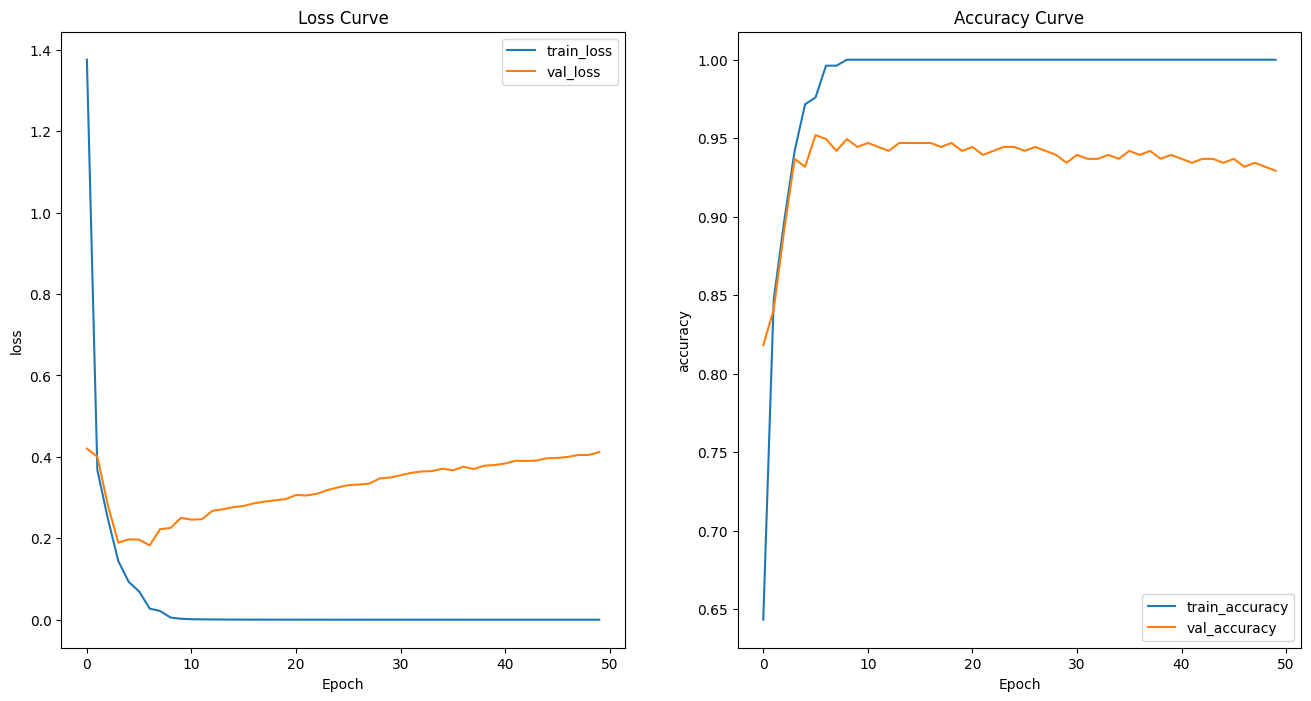

In [62]:
plot_history(history)

## 테스트

In [63]:
# 스케일링
x_test.shape

(495, 224, 224, 3)

In [64]:
y_pred = model.predict(x_test_s)
y_pred = y_pred.argmax(axis=1)
y_pred

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.3838, prec: 0.1919, recall: 0.5000, f1: 0.2774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


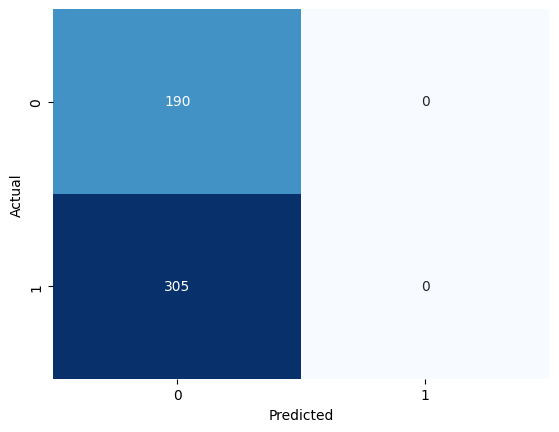

In [67]:
print_metrics(y_test, y_pred)